# Intervalos de Confiança


# Hiram Amaral
# Baseado no material do prof.Francisco A. Rodrigues<br> 


Esse notebook é relacionado à aula: 
https://www.youtube.com/watch?v=AkmyfLc-EOs

Podemos interpretaro intervalo de confiança de $(1-\alpha)100\%$ através de simulações. 

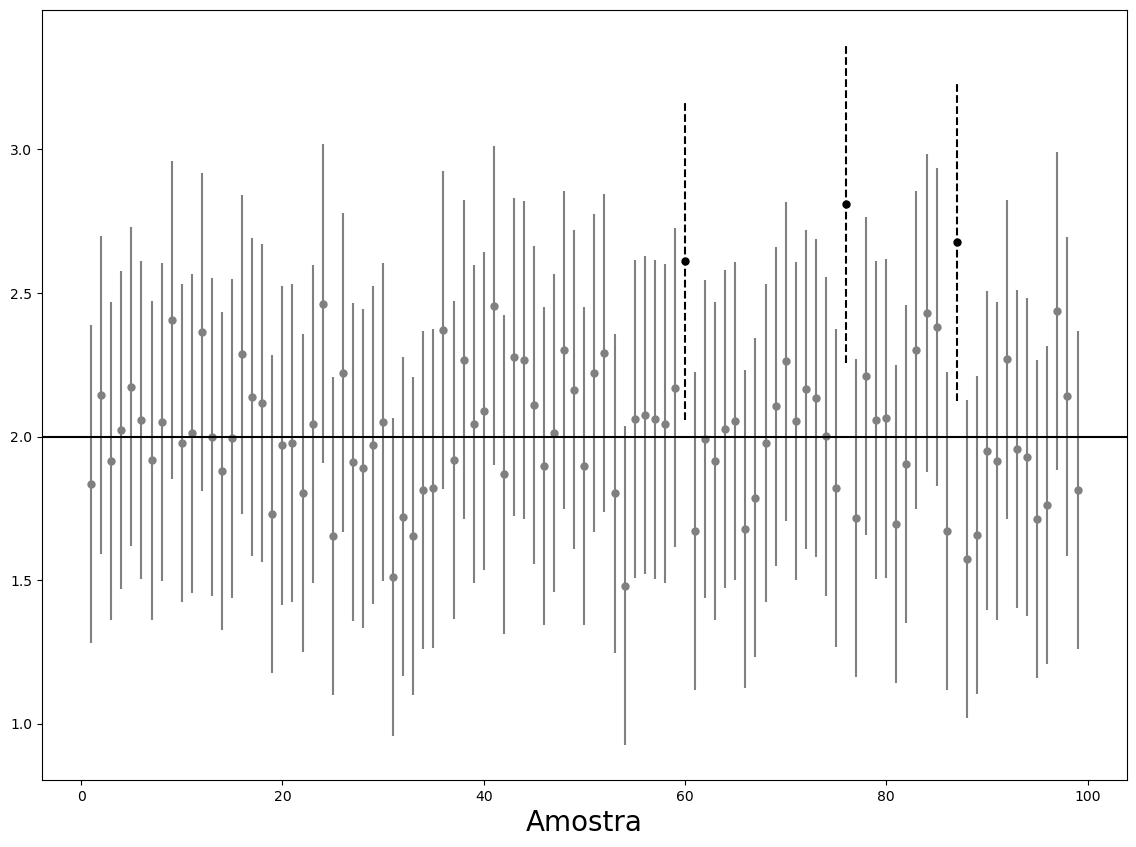

Nível de confiança: 0.95
Fraçao de intervalos que contém a média: 0.96


In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 50 # tamanho da amostra
Ns = 100 # numero de intervalos
mu = 2 # media populacional
sigma = 2 # desvio padrão populacional
beta = 0.95 # nivel de confianca
zalpha = 1.96 # valor de z (a partir de beta)
c = 0 # conta o numero de intervalos que contem a media
plt.figure(figsize=(14,10))
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    IC1 = np.mean(x) - zalpha*sigma/np.sqrt(n) #intervalo inferior
    IC2 = np.mean(x) + zalpha*sigma/np.sqrt(n) #intervalo superior
    if(mu > IC1 and mu < IC2):
        c =  c + 1
        # mostra o intervalo em cinza se continar a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'gray')
        plt.plot(s,np.mean(x), 'o', color = 'gray', 
                 markersize=5)
    else:
        # mostra o intervalo que nao contem a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'black', linestyles = 'dashed')
        plt.plot(s,np.mean(x), 'o', color = 'black',
                 markersize=5)
plt.axhline(y = mu, color = 'black') # mostra a media populacional
plt.xlabel('Amostra', fontsize=20)
plt.show()
print('Nível de confiança:', beta)
print('Fraçao de intervalos que contém a média:', c/Ns)

## Calculo do Intervalo de confiança

Podemos implementar uma função para calcular o intervalo de confiança automaticamente. 

In [23]:
import scipy.stats
import numpy as np

def confident_interval(Xs, n, confidence = 0.95, sigma = -1, s = -1):
    zalpha = abs(scipy.stats.norm.ppf((1 - confidence)/2.))
    if(sigma != -1): # se a variancia eh conhecida
        IC1 = Xs - zalpha*sigma/np.sqrt(n)
        IC2 = Xs + zalpha*sigma/np.sqrt(n)
    else: # se a variancia eh desconhecida
        if(n >= 50): # se o tamanho da amostra eh maior do que 50
            # Usa a distribuicao normal
            IC1 = Xs - zalpha*s/np.sqrt(n)
            IC2 = Xs + zalpha*s/np.sqrt(n)
        else: # se o tamanho da amostra eh menor do que 50
            # Usa a distribuicao t de Student
            talpha = scipy.stats.t.ppf((1 + confidence) / 2., n-1)
            IC1 = Xs - talpha*s/np.sqrt(n)
            IC2 = Xs + talpha*s/np.sqrt(n)
    return [IC1, IC2]

**Exemplo**: Em uma empresa de distribuição de alimentos pela internet, verificou-se que o tempo necessário para uma entrega tem distribuição normal com média $\mu = 30$ minutos e desvio padrão $\sigma = 10$ minutos. Em uma amostra de 50 entregadores, observou-se um tempo médio de entrega $\bar{X}_{50} = 25$ minutos. Determine o intervalo de 95\% de confiança para a média $\mu$ de todos os entregadores da empresa.

In [24]:
Xs = 25
n = 50
confidence =0.95
sigma = 10
IC = confident_interval(Xs,n, confidence, sigma)
print('Confidence interval:', IC)

Confidence interval: [22.228192351300645, 27.771807648699355]


**Exemplo** Em um provedor de videos na Internet, verificou-se que para uma amostra de 15 usuários, o tempo médio de exibição é igual a $\bar{X}_{15} = 39,3$ minutos e o desvio padrão da amostra $S_{15} = 2,6$ minutos. Encontre um intervalo de 90\% para a média populacional $\mu$.

In [20]:
Xs = 39.3
s = 2.6
n = 15
confidence =0.9

IC = confident_interval(Xs,n, confidence, -1, s)
print('Confidence interval:', IC)

Confidence interval: [38.117602363950525, 40.48239763604947]


Para um conjunto de dados, temos a função abaixo.

In [7]:
import scipy.stats
import numpy as np

def confident_interval_data(X, confidence = 0.95, sigma = -1):
    def S(X): #funcao para calcular o desvio padrao amostral
        s = 0
        for i in range(0,len(X)):
            s = s + (X[i] - np.mean(X))**2
        s = np.sqrt(s/(len(X)-1))
        return s
    n = len(X) # numero de elementos na amostra
    Xs = np.mean(X) # media amostral
    s = S(X) # desvio padrao amostral
    zalpha = abs(scipy.stats.norm.ppf((1 - confidence)/2))
    if(sigma != -1): # se a variancia eh conhecida
        IC1 = Xs - zalpha*sigma/np.sqrt(n)
        IC2 = Xs + zalpha*sigma/np.sqrt(n)
    else: # se a variancia eh desconhecida
        if(n >= 50): # se o tamanho da amostra eh maior do que 50
            # Usa a distribuicao normal
            IC1 = Xs - zalpha*s/np.sqrt(n)
            IC2 = Xs + zalpha*s/np.sqrt(n)
        else: # se o tamanho da amostra eh menor do que 50
            # Usa a distribuicao t de Student
            talpha = scipy.stats.t.ppf((1 + confidence) / 2., n-1)
            IC1 = Xs - talpha*s/np.sqrt(n)
            IC2 = Xs + talpha*s/np.sqrt(n)
    return [IC1, IC2]

Executando para um exemplo.

In [21]:
X = [1, 2, 3, 4, 5]
confidence = 0.95

IC = confident_interval_data(X, confidence)
print('Confidence interval:', IC)

Confidence interval: [1.0367568385224393, 4.9632431614775605]
